In [901]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [902]:
from sklearn.linear_model import LogisticRegression

In [903]:
from sklearn.svm import SVC

In [904]:
from sklearn.tree import DecisionTreeClassifier

In [905]:
from sklearn.ensemble import RandomForestClassifier

In [906]:
from sklearn.neighbors import KNeighborsClassifier

In [907]:
from sklearn.naive_bayes import GaussianNB

In [908]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

In [909]:
from sklearn.preprocessing import StandardScaler

In [910]:
from sklearn.metrics import confusion_matrix

In [911]:
df=pd.read_csv('./Heart.csv')

In [912]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [913]:
df.shape

(303, 14)

In [914]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking for null values

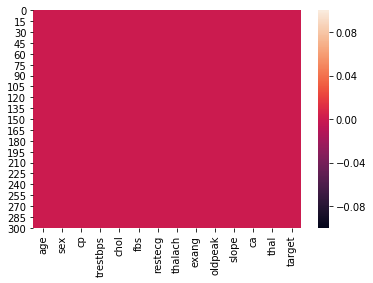

In [915]:
sns.heatmap(df.isnull())

In [916]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking for balanced dataset 

In [917]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

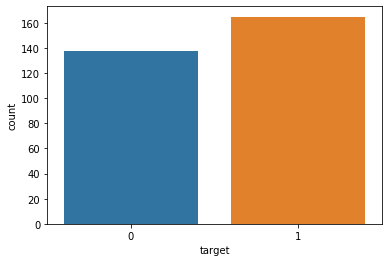

In [918]:
sns.countplot('target',data=df)

### Checking Correlation

In [919]:
correlation=df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [920]:
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [921]:
x=df.drop('target',axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [922]:
y=df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [923]:
from sklearn.ensemble import ExtraTreesClassifier

In [924]:
corr=ExtraTreesClassifier()

In [925]:
corr.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [926]:
print(corr.feature_importances_)

[0.0701357  0.05299063 0.12262071 0.06117142 0.0595239  0.01874534
 0.04025409 0.08621086 0.09958195 0.09239228 0.06407725 0.12656747
 0.10572838]


In [927]:
feature_importance=pd.Series(corr.feature_importances_,index=x.columns)
feature_importance.sort_values(ascending=False)

ca          0.126567
cp          0.122621
thal        0.105728
exang       0.099582
oldpeak     0.092392
thalach     0.086211
age         0.070136
slope       0.064077
trestbps    0.061171
chol        0.059524
sex         0.052991
restecg     0.040254
fbs         0.018745
dtype: float64

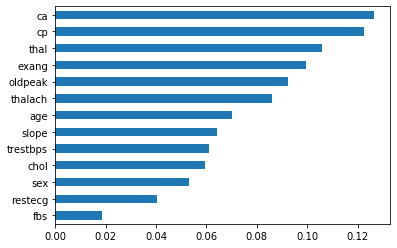

In [928]:
feature_importance.sort_values(ascending=True).plot(kind='barh')

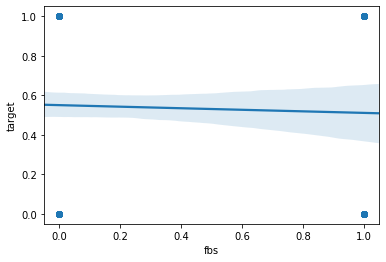

In [929]:
# it is least correlated to to drop it
sns.regplot(x='fbs',y='target',data=df)

### Droping the features which are not correlated

In [930]:
df.drop('fbs',axis=1,inplace=True)

In [931]:
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


In [932]:
df.shape

(303, 13)

### Feature Engineering

In [933]:
for i in df.columns:
    print(i,df[i].unique())
    print('\n')

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


sex [1 0]


cp [3 2 1 0]


trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]


reste

#### sex,cp,restecg,exang,slope,ca,thal,target are categorical column

In [934]:
new_sex=pd.get_dummies(data=df['sex'],prefix='sex')
new_sex

,sex_0,sex_1
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
298,1,0
299,0,1
300,0,1
301,0,1


In [935]:
new_cp=pd.get_dummies(df['cp'],prefix='chestPain')
new_cp

,chestPain_0,chestPain_1,chestPain_2,chestPain_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [936]:
new_restecg=pd.get_dummies(df['restecg'],prefix='restecg')
new_restecg

,restecg_0,restecg_1,restecg_2
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


In [937]:
new_exang=pd.get_dummies(df['exang'],prefix='exang')
new_exang

,exang_0,exang_1
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
298,0,1
299,1,0
300,1,0
301,0,1


In [938]:
new_slope=pd.get_dummies(df['slope'],prefix='slope')
new_slope

,slope_0,slope_1,slope_2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


In [939]:
new_thal=pd.get_dummies(df['thal'],prefix='thal')
new_thal

,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,0,0,0,1
300,0,0,0,1
301,0,0,0,1


In [940]:
new_ca=pd.get_dummies(df['ca'],prefix='ca')
new_ca

,ca_0,ca_1,ca_2,ca_3,ca_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
298,1,0,0,0,0
299,1,0,0,0,0
300,0,0,1,0,0
301,0,1,0,0,0


In [941]:
app=[df,new_sex,new_cp,new_restecg,new_ca,new_thal,new_exang,new_slope]

In [942]:
df1=pd.concat(app,axis=1)

In [943]:
df1.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,63,1,3,145,233,0,150,0,2.3,0,...,0,0,1,0,0,1,0,1,0,0
1,37,1,2,130,250,1,187,0,3.5,0,...,0,0,0,1,0,1,0,1,0,0
2,41,0,1,130,204,0,172,0,1.4,2,...,0,0,0,1,0,1,0,0,0,1
3,56,1,1,120,236,1,178,0,0.8,2,...,0,0,0,1,0,1,0,0,0,1
4,57,0,0,120,354,1,163,1,0.6,2,...,0,0,0,1,0,0,1,0,0,1


In [944]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'sex_0', 'sex_1',
       'chestPain_0', 'chestPain_1', 'chestPain_2', 'chestPain_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'thal_0', 'thal_1', 'thal_2', 'thal_3', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2'],
      dtype='object')

In [945]:
df1.drop(['sex','cp','restecg','thal','exang','ca','slope'],axis=1,inplace=True)

In [946]:
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,63,145,233,150,2.3,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,41,130,204,172,1.4,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,56,120,236,178,0.8,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
4,57,120,354,163,0.6,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [947]:
df1.shape

(303, 29)

### Feature Scaling

In [948]:
sc=StandardScaler()

In [949]:
df1[['age','trestbps','chol','oldpeak','thalach']]=sc.fit_transform(df1[['age','trestbps','chol','oldpeak','thalach']])

In [950]:
df1.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,chestPain_0,chestPain_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
6,0.180175,0.478391,0.922521,0.146634,0.224643,1,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
9,0.290464,1.049520,-1.512490,1.064975,0.483451,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [951]:
df1.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'chestPain_0', 'chestPain_1', 'chestPain_2', 'chestPain_3',
       'restecg_0', 'restecg_1', 'restecg_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'exang_0', 'exang_1',
       'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [952]:
x=df1.drop('target',axis=1)
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,chestPain_0,chestPain_1,chestPain_2,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,0,0,0,1,1,0,0,1,0
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [953]:
y=df1['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Applying ML Alogorithms

In [954]:
cv=ShuffleSplit(n_splits=8,test_size=0.3,random_state=42)

In [955]:
lr=LogisticRegression()

In [956]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy'))

[0.85714286 0.83516484 0.86813187 0.89010989 0.83516484 0.86813187
 0.87912088 0.84615385]


In [957]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy').mean())

0.8598901098901099


In [958]:
svc=SVC()

In [959]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy'))

[0.86813187 0.83516484 0.84615385 0.85714286 0.83516484 0.84615385
 0.84615385 0.8021978 ]


In [960]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy').mean())

0.842032967032967


In [961]:
dt=DecisionTreeClassifier()

In [962]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy'))

[0.76923077 0.76923077 0.73626374 0.73626374 0.72527473 0.81318681
 0.75824176 0.73626374]


In [963]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy').mean())

0.7733516483516484


In [964]:
rf=RandomForestClassifier()

In [965]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy'))

[0.83516484 0.82417582 0.84615385 0.8021978  0.83516484 0.83516484
 0.86813187 0.81318681]


In [966]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy').mean())

0.8228021978021978


In [967]:
knn=KNeighborsClassifier(n_neighbors=3)

In [968]:
print(cross_val_score(knn,x,y,cv=cv,scoring='accuracy'))

[0.81318681 0.83516484 0.82417582 0.81318681 0.8021978  0.85714286
 0.87912088 0.82417582]


In [969]:
print(cross_val_score(knn,x,y,cv=cv,scoring='accuracy').mean())

0.831043956043956


### From cross val score Logistic Regression gives the max accuracy

In [988]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [989]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [990]:
prediction=lr.predict(x_test)
prediction

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [991]:
lr.score(x_train,y_train)

0.8726415094339622

In [992]:
confusion_matrix(y_test,prediction)

array([[33,  8],
       [ 5, 45]])

In [993]:
37+4+8+42

91

In [994]:
acc=(33+45)/91
acc

0.8571428571428571